# **Tarea Unidad 1**

## CASO



El uso intensivo de redes sociales se ha convertido en un determinante emergente de la salud, especialmente en poblaciones jóvenes. Diversos estudios han señalado asociaciones entre el consumo excesivo de redes sociales y:
alteraciones en la salud mental (ansiedad, estrés, bajo estado de ánimo), trastornos del sueño,
dificultades en la regulación emocional,
deterioro de las relaciones interpersonales.

Sin embargo, muchas instituciones de salud, universidades y programas de bienestar toman decisiones de prevención y atención sin un análisis estructurado de datos, basándose principalmente en percepciones generales o casos aislados.

Este dataset permite explorar cuantitativamente estas relaciones y aportar evidencia para apoyar decisiones en el ámbito de la salud pública y la salud estudiantil.

El objetivo de este análisis exploratorio es identificar patrones de riesgo asociados al uso de redes sociales y su relación con indicadores clave de salud en estudiantes, con el fin de Apoyar decisiones preventivas y de intervención temprana en salud mental y bienestar.

No se busca realizar diagnósticos clínicos individuales, sino identificar tendencias poblacionales que orienten estrategias de promoción y prevención en salud

## Metodo usado

Para el desarrollo de este análisis exploratorio de datos (EDA), el equipo decidió utilizar la metodología OSEMN (Obtain, Scrub, Explore, Model, Interpret), debido a que se ajusta de manera natural a las características del dataset y al objetivo principal del trabajo, enfocado en salud y análisis exploratorio, más que en modelado predictivo avanzado.

OSEMN ofrece una estructura flexible, clara y orientada al análisis, permitiendo avanzar de forma ordenada desde la adquisición de los datos hasta la interpretación de resultados con impacto en la toma de decisiones en salud.

## Obtain

URL del archivo a usar: https://www.kaggle.com/datasets/zahranusratt/student-social-media-addiction-analysis-dataset/data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('Students Social Media Addiction.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

##Limpieza

**Eliminación de datos nulos**

In [ ]:
df = df.dropna()

Eliminación de columnas no utiles

In [ ]:
dff= df.drop(columns=['Student_ID'])
dff

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


##Exploración

In [ ]:
dff.describe()

,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


**Box plot datos cuantitativos**

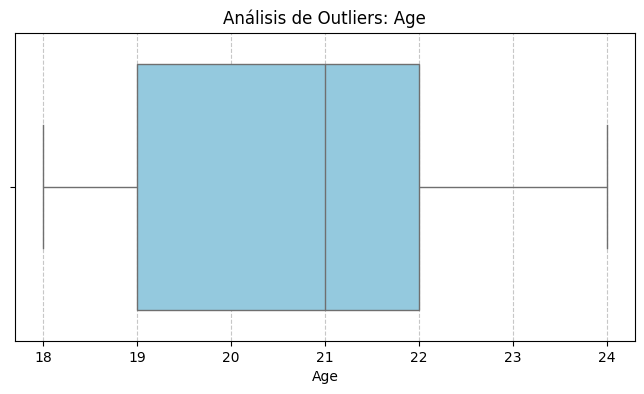

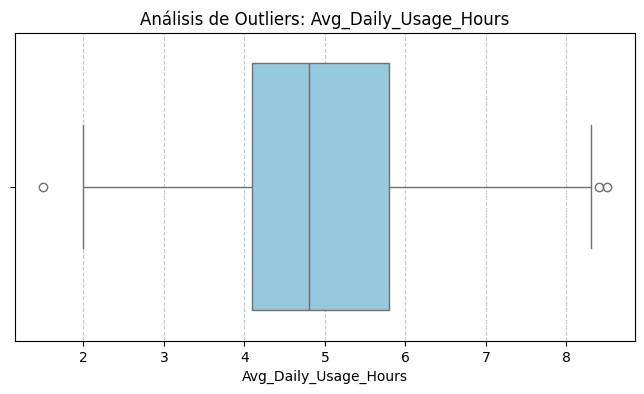

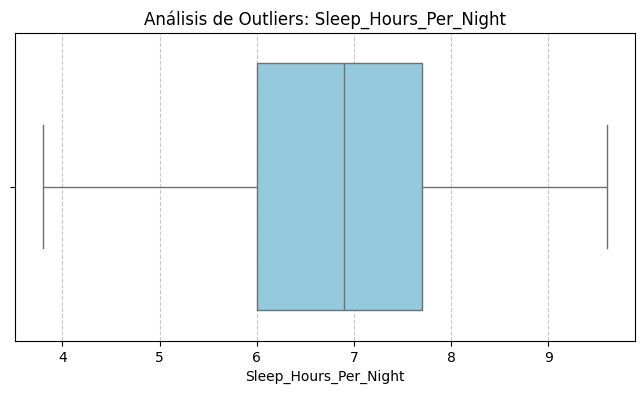

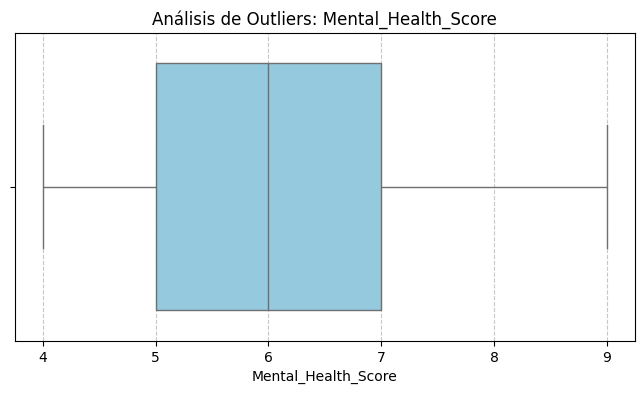

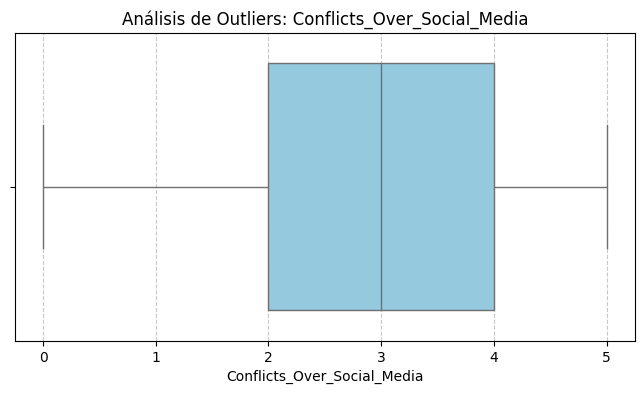

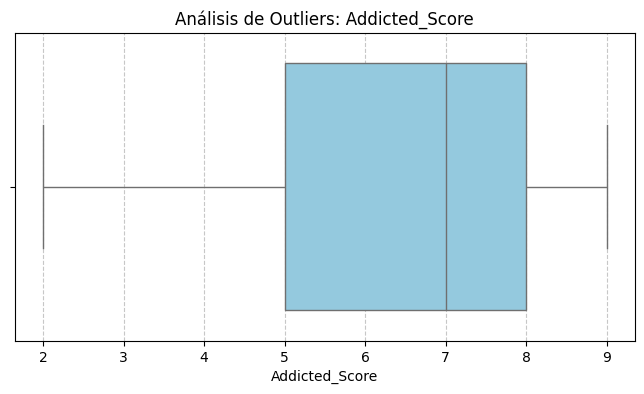

In [ ]:
# Filtramos solo las columnas numéricas
columnas_numericas = dff.select_dtypes(include=['float64', 'int64']).columns

# Creamos una cuadrícula de gráficos
for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Análisis de Outliers: {col}')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

**Grafica de barras para datos cualitativos**

/tmp/ipython-input-2401169287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='magma')


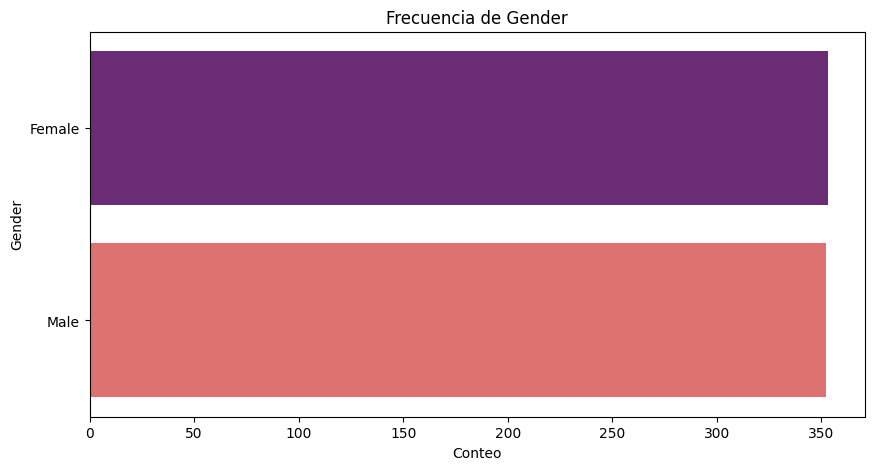

/tmp/ipython-input-2401169287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='magma')


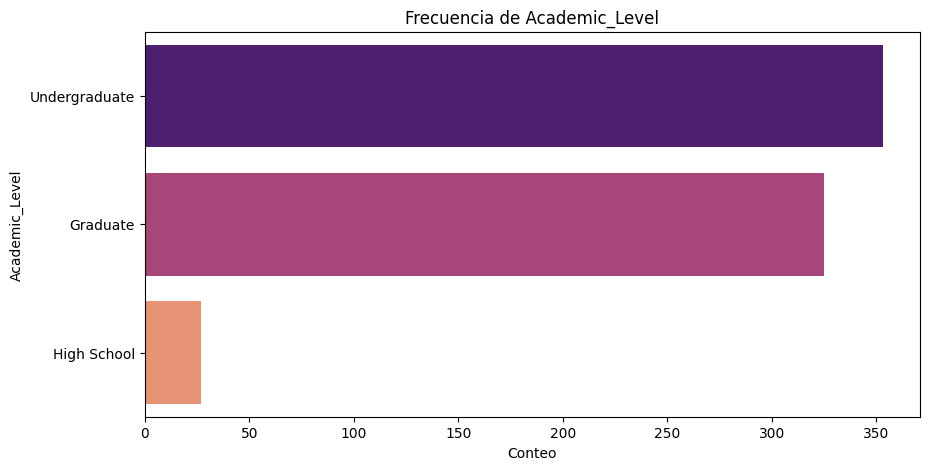

/tmp/ipython-input-2401169287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='magma')


La columna 'Country' tiene demasiadas categorías (110) para un gráfico de barras simple.


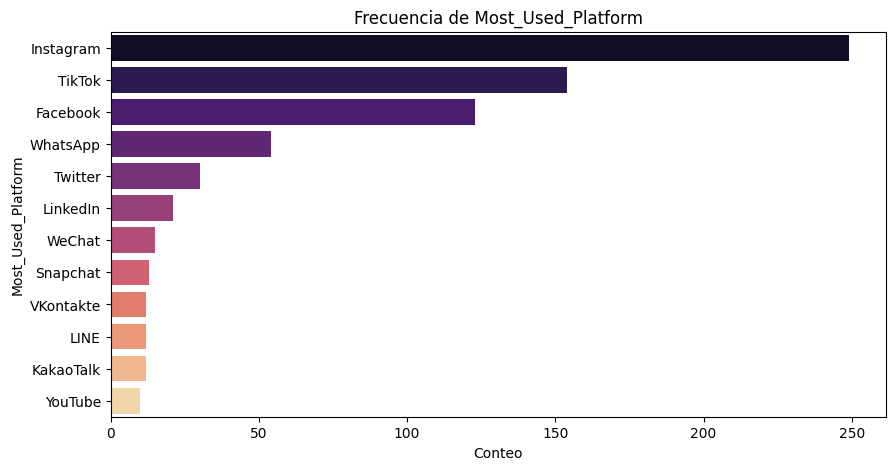

/tmp/ipython-input-2401169287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='magma')


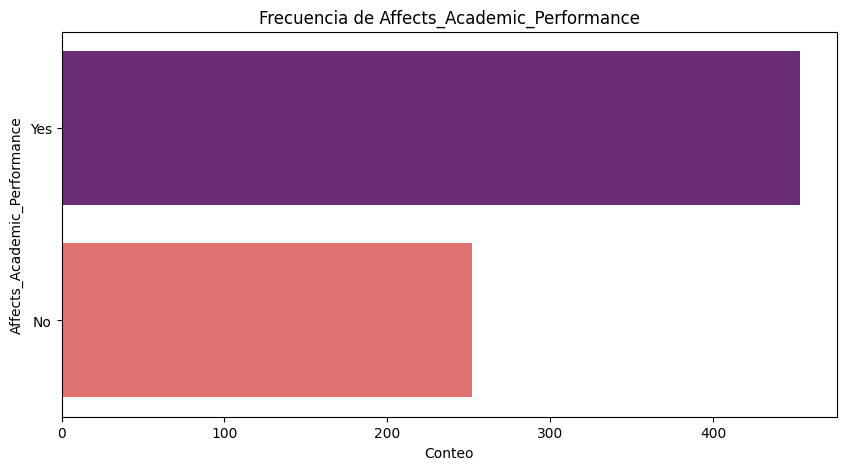

/tmp/ipython-input-2401169287.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='magma')


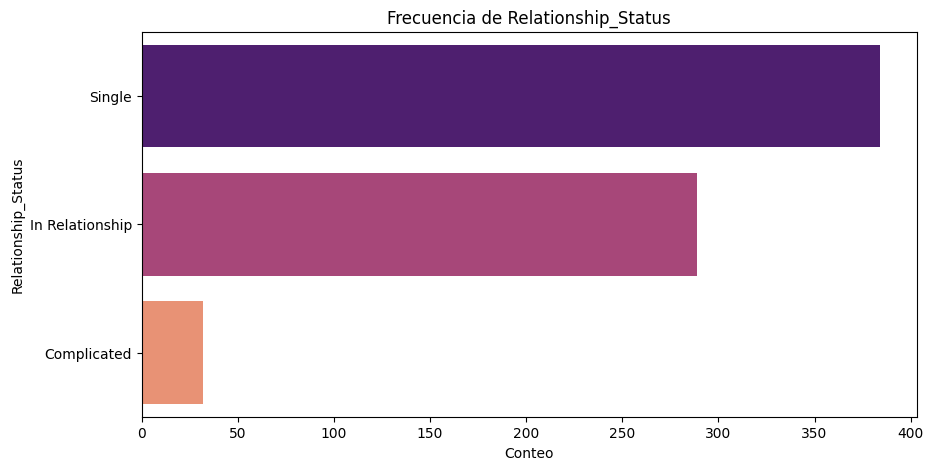

In [ ]:
# Seleccionamos solo las columnas categóricas (tipo object o category)
columnas_categoricas = dff.select_dtypes(include=['object', 'category']).columns

for col in columnas_categoricas:
    # Verificamos que no tenga demasiadas categorías únicas (para que el gráfico sea legible)
    if dff[col].nunique() < 20:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='magma')
        plt.title(f'Frecuencia de {col}')
        plt.xlabel('Conteo')
        plt.ylabel(col)
        plt.show()
    else:
        print(f"La columna '{col}' tiene demasiadas categorías ({dff[col].nunique()}) para un gráfico de barras simple.")

## Modelado

**Correlación de las columnas**

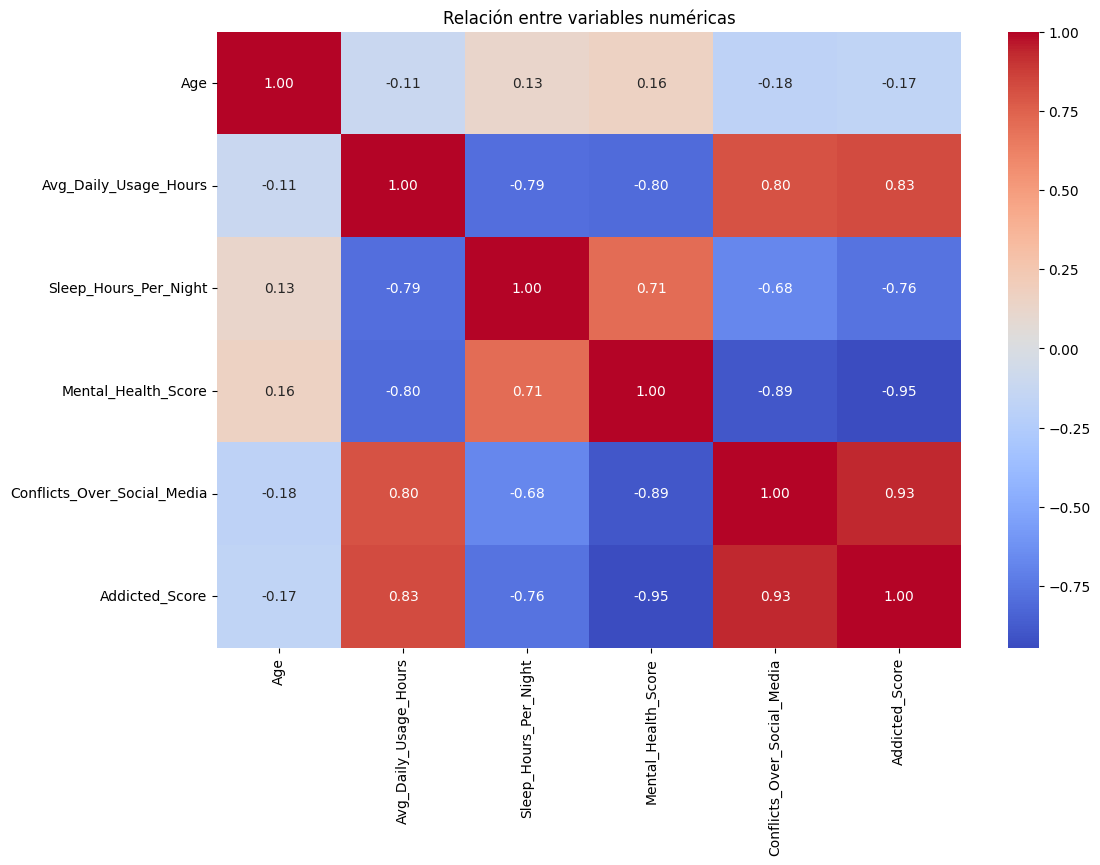

In [ ]:
corr_matrix = dff.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Relación entre variables numéricas')
plt.show()

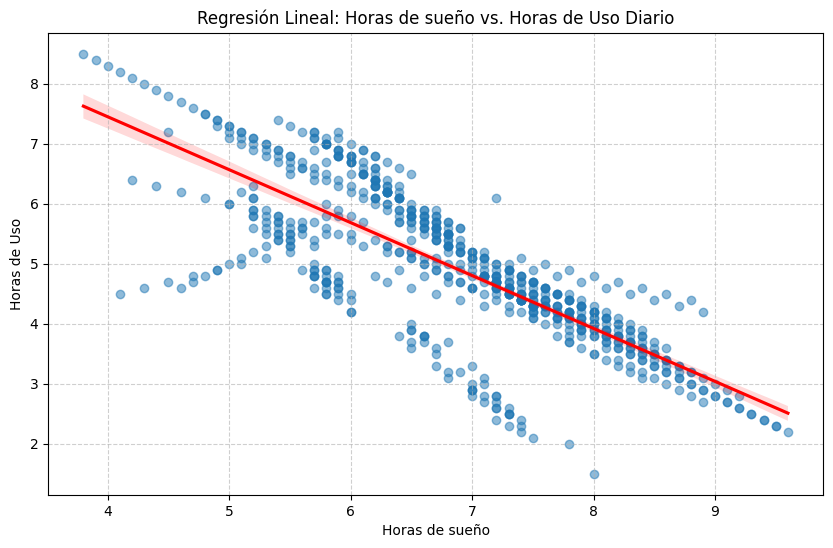

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=dff, x='Sleep_Hours_Per_Night', y='Avg_Daily_Usage_Hours',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Horas de sueño vs. Horas de Uso Diario')
plt.xlabel('Horas de sueño')
plt.ylabel('Horas de Uso')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

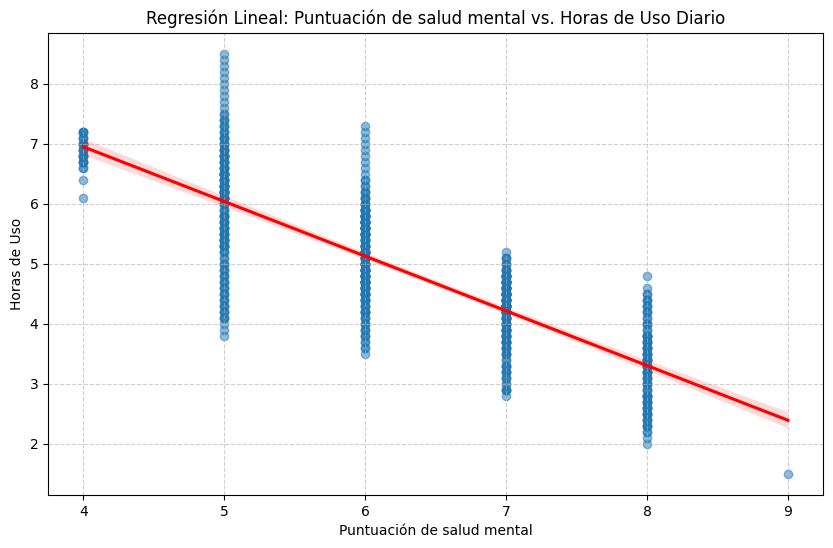

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=dff, x='Mental_Health_Score', y='Avg_Daily_Usage_Hours',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Puntuación de salud mental vs. Horas de Uso Diario')
plt.xlabel('Puntuación de salud mental')
plt.ylabel('Horas de Uso')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

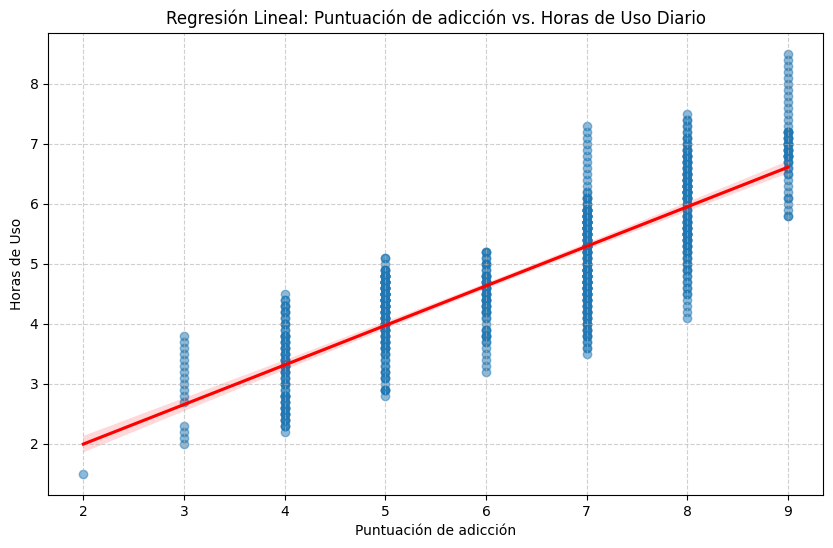

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=dff, x='Addicted_Score', y='Avg_Daily_Usage_Hours',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Puntuación de adicción vs. Horas de Uso Diario')
plt.xlabel('Puntuación de adicción')
plt.ylabel('Horas de Uso')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

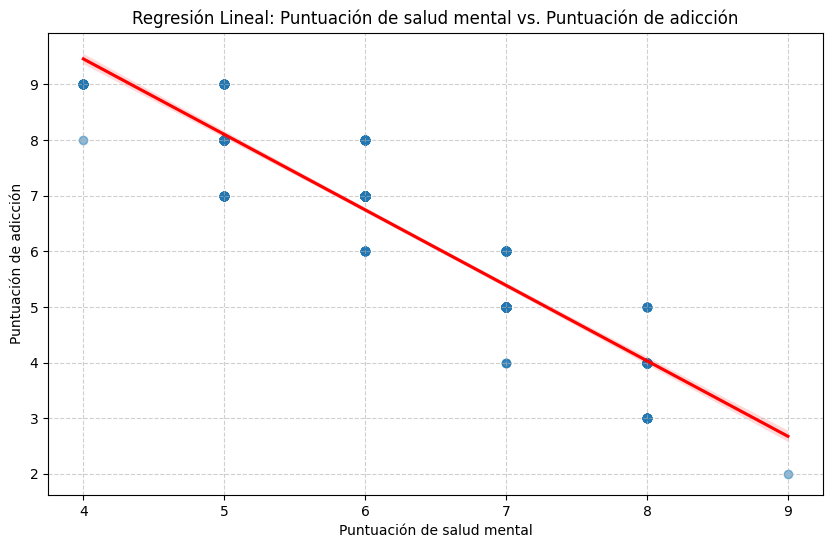

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=dff, x='Mental_Health_Score', y='Addicted_Score',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Puntuación de salud mental vs. Puntuación de adicción')
plt.xlabel('Puntuación de salud mental')
plt.ylabel('Puntuación de adicción')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

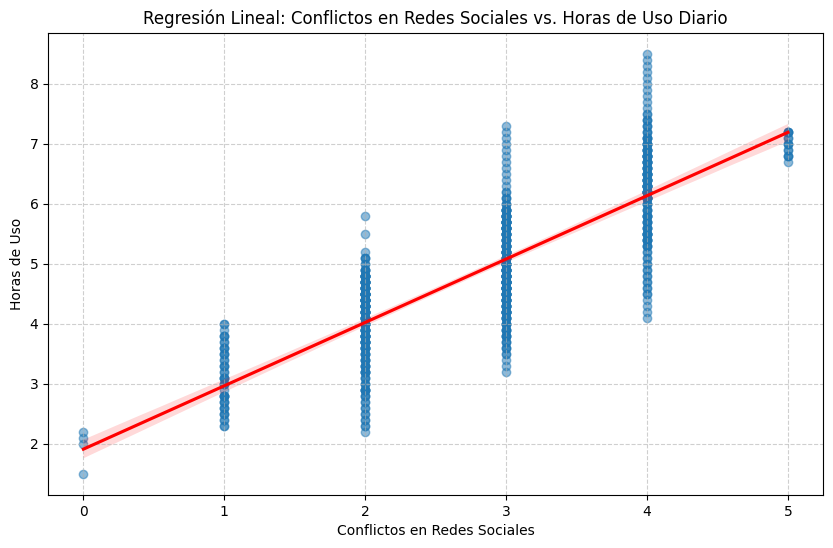

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=dff, x='Conflicts_Over_Social_Media', y='Avg_Daily_Usage_Hours',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Conflictos en Redes Sociales vs. Horas de Uso Diario')
plt.xlabel('Conflictos en Redes Sociales')
plt.ylabel('Horas de Uso')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

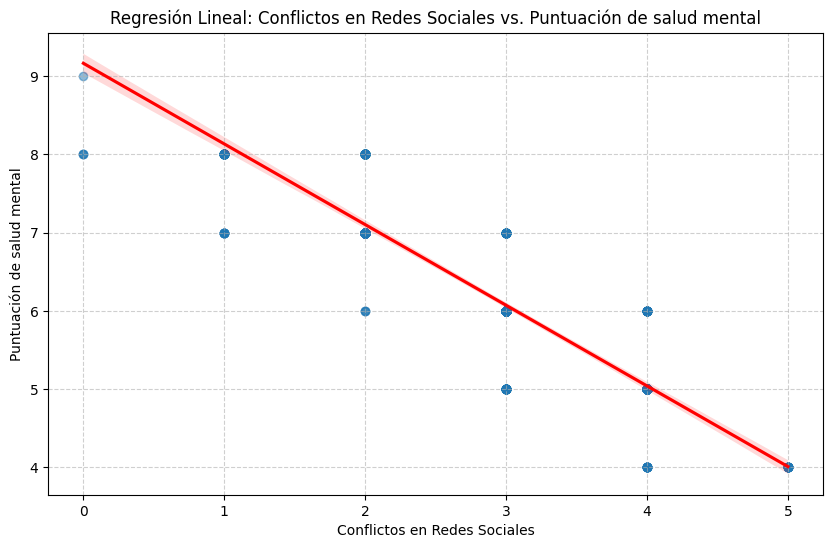

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=dff, x='Conflicts_Over_Social_Media', y='Mental_Health_Score',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Conflictos en Redes Sociales vs. Puntuación de salud mental')
plt.xlabel('Conflictos en Redes Sociales')
plt.ylabel('Puntuación de salud mental')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

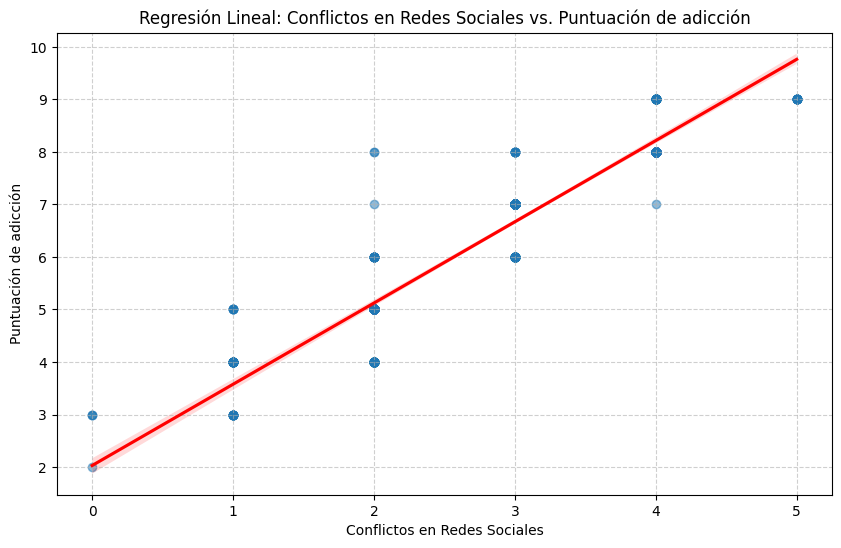

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(data=dff, x='Conflicts_Over_Social_Media', y='Addicted_Score',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Regresión Lineal: Conflictos en Redes Sociales vs. Puntuación de adicción')
plt.xlabel('Conflictos en Redes Sociales')
plt.ylabel('Puntuación de adicción')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

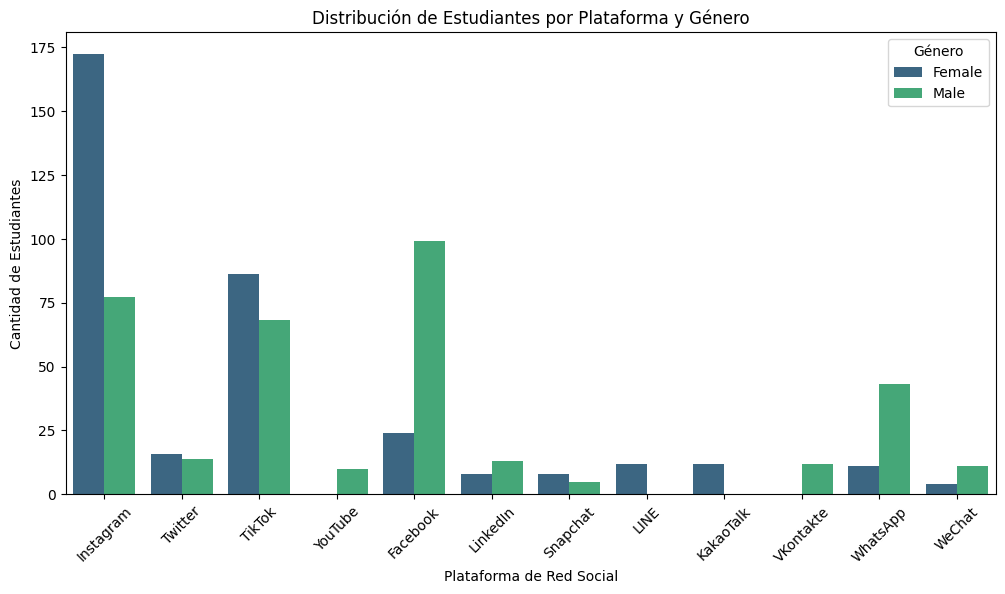

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=dff, x='Most_Used_Platform', hue='Gender', palette='viridis')
plt.title('Distribución de Estudiantes por Plataforma y Género')
plt.xlabel('Plataforma de Red Social')
plt.ylabel('Cantidad de Estudiantes')
plt.xticks(rotation=45)
plt.legend(title='Género')
plt.show()

/tmp/ipython-input-3966321859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dff, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', palette='Reds', estimator='mean')


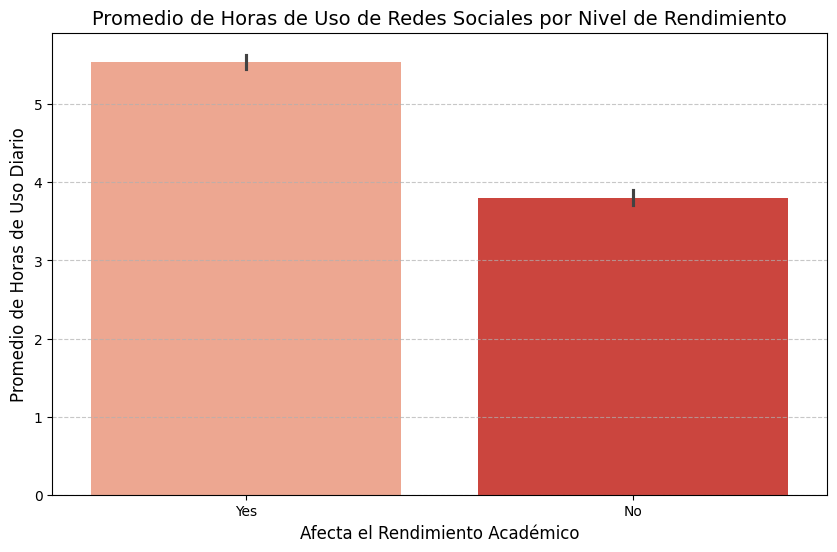

In [ ]:
plt.figure(figsize=(10, 6))
# Calculamos el promedio de uso diario para cada nivel de rendimiento
sns.barplot(data=dff, x='Affects_Academic_Performance', y='Avg_Daily_Usage_Hours', palette='Reds', estimator='mean')

plt.title('Promedio de Horas de Uso de Redes Sociales por Nivel de Rendimiento', fontsize=14)
plt.xlabel('Afecta el Rendimiento Académico', fontsize=12)
plt.ylabel('Promedio de Horas de Uso Diario', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

/tmp/ipython-input-3743087566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Affects_Academic_Performance', y='Sleep_Hours_Per_Night', palette='Blues', estimator='mean')


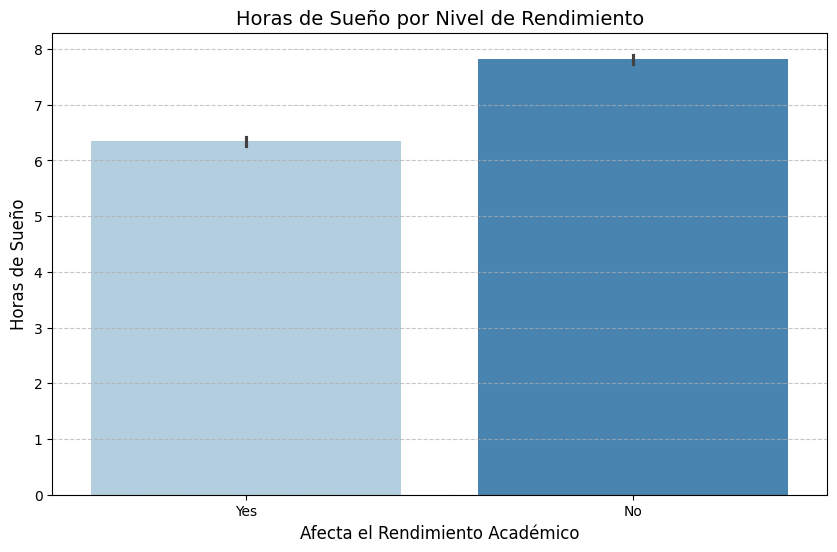

In [ ]:
plt.figure(figsize=(10, 6))
# Calculamos el promedio de sueño para cada nivel de rendimiento
sns.barplot(data=df, x='Affects_Academic_Performance', y='Sleep_Hours_Per_Night', palette='Blues', estimator='mean')

plt.title('Horas de Sueño por Nivel de Rendimiento', fontsize=14)
plt.xlabel('Afecta el Rendimiento Académico', fontsize=12)
plt.ylabel('Horas de Sueño', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Grafico de radar para las plataformas más usadas**

In [ ]:
# 2. Seleccionar las columnas numéricas para el gráfico
categories = ['Mental_Health_Score', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Addicted_Score']

# 3. NORMALIZACIÓN (Paso crítico para que todo quepa de 0 a 1)
scaler = MinMaxScaler()
df_norm = dff.copy()
df_norm[categories] = scaler.fit_transform(dff[categories])

# Agrupamos por género y calculamos el promedio de las columnas numéricas
df_promedios = df_norm.groupby('Most_Used_Platform')[categories].mean().reset_index()

# Filtramos para incluir solo las plataformas deseadas
platforms_to_show = ['Instagram', 'Twitter', 'TikTok', 'Facebook']
df_promedios = df_promedios[df_promedios['Most_Used_Platform'].isin(platforms_to_show)]

# 4. Crear el gráfico de radar
fig = go.Figure()

# Colores para cada nivel académico
colors = ['deepskyblue', 'salmon', 'lightgreen','#ff7f0e']

for i, (index, row) in enumerate(df_promedios.iterrows()):
    # Extraer valores y cerrar el círculo (repitiendo el primero al final)
    r_values = row[categories].tolist()
    r_values.append(r_values[0])

    theta_values = categories + [categories[0]]

    fig.add_trace(go.Scatterpolar(
        r=r_values,
        theta=theta_values,
        fill='toself',
        name=row['Most_Used_Platform'], # Usa el nombre de la columna de niveles
        line=dict(color=colors[i % len(colors)])
    ))

# 5. Configuración estética (Dark Mode y Rangos)
fig.update_layout(
    title="Perfiles Promedio por las plataformas más usadas (Datos Normalizados 0-1)",
    template="plotly_dark",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1] # Forzamos la escala de 0 a 1
        )),
    showlegend=True
)

fig.show()


##Interpretación

Tras aplicar el análisis EDA de los datos sobre la base de datos de la adicción a redes sociales en los estudiantes llegamos a varias conclusiones que son claves para la toma de decisiones en la salud de los estudiantes.

Según las gráficas de las regresiones lineales realizadas, se ve una relación inversa entre las horas de sueño y las horas diarias en promedio de uso de las redes sociales, por lo que podemos concluir que a mayor horas diarias en promedio de uso hay menor hora de sueño, por lo que también podemos interpretar que entre menos horas de sueño peor es el rendimiento académico del estudiante.

Del mismo modo, podemos interpretar que entre mas horas diarias de uso de las redes sociales hay una peor puntuación de salud mental, junto a esto, se ve un incremento de los conflictos de las redes sociales. Además, se puede ver que entre más horas diarias de uso y menor puntuación de salud mental hay mayor puntuación en la adicción.

En la gráfica de radar, podemos observar que las redes como Instagram y TikTok presentan mayor horas de uso diario y puntuación de adicción en comparación de otras plataformas como Facebook y Twitter, estas dos plataformas (Instagram y TikTok) se basan en un consumo rápido y en algoritmos que dan una gratificación inmediata lo que dificulta el control del tiempo de uso.

Los resultados de este análisis nos lleva a pensar en estrategias de intervención, no solo basándose en restringir el uso de las redes sociales si no en promover buenos hábitos, como en trabajo del manejo de las emociones frente a conflictos en las redes sociales.